In [0]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
labelEncoder = LabelEncoder()

In [0]:
dataset = pd.read_csv('geelongbuiltenv.csv')

In [0]:
dataset.head()

,Suburb,LUM,LUMquintile,TrainDistThresh,TrainPres,BusDistThresh,BusPres,AccUtDestPres,AccUtDestPresquintile,AccUtDestDist,AccUtDestDistquintile,SprtLeiDens,SprtLeiDensquintile,SprtLeiDist,SprtLeiDistquintile,POSDist,POSDistquintile,POSAreaPct,POSAreaPctquintile,TakeawayDens,TakeawayDensquintile,TakeawayDist,TakeawayDistquintile,HealthyFoodDensity,HealthyFoodDensityquintile,HealthyFoodDist,HealthyFoodDistquintile,GrossDwlDens,GrossDwlDensquintile,StrtConn,StrtConnquintile,ActCenDist,ActCenDistquintile,TobPopDensp1000,TobPopDensp1000quintile,TobTobVendDist,TobTobVendDistquintile,RatioTrailsToRoads,RatioTrailsToRoadsquintile
0,Clifton Springs,0.418636,4,0,0,1,1,2,2,2,2,0.000000,1,2334.840293,3,195.308128,1,0.211762,4,0.088528,3,734.854534,2,0.000000,1,2681.513753,4,6.138845,4,41.378732,4,21768.170070,4,0.419933,2,775.371825,3,0.063443,2
1,Geelong West,0.512726,4,1,0,1,1,7,5,7,5,0.000000,1,913.552249,1,250.556874,3,0.031718,1,0.485292,5,341.128302,1,0.178792,5,584.101684,1,13.940743,5,77.755440,5,1812.155338,1,2.996704,4,315.721995,1,0.025997,1
2,Newcomb/Moolap,0.209689,2,0,0,1,1,5,3,4,4,0.020258,3,1400.551320,2,324.854903,4,0.425467,5,0.162064,4,769.448651,3,0.050645,2,1366.097985,2,0.676011,3,7.134546,3,5267.718643,2,2.670940,4,746.243079,2,0.135687,3
3,City/Drum/Sth Geelong,0.847546,5,1,1,1,1,7,5,7,5,0.037318,4,965.344308,1,229.975343,2,0.142600,4,0.621958,5,369.506218,1,0.024878,2,956.274668,2,7.481207,5,113.265985,5,1663.495404,1,9.479434,5,316.179185,1,0.172038,3
4,Hamlyn Heights,0.307938,3,0,0,1,1,3,2,4,3,0.000000,1,1967.155970,3,295.410346,3,0.103317,4,0.056174,3,721.547118,2,0.028087,2,932.819631,2,9.638756,5,57.587787,5,4325.191244,1,0.329327,2,669.341899,2,0.157551,3


In [0]:
dataset.describe(include='all')

,Suburb,LUM,LUMquintile,TrainDistThresh,TrainPres,BusDistThresh,BusPres,AccUtDestPres,AccUtDestPresquintile,AccUtDestDist,AccUtDestDistquintile,SprtLeiDens,SprtLeiDensquintile,SprtLeiDist,SprtLeiDistquintile,POSDist,POSDistquintile,POSAreaPct,POSAreaPctquintile,TakeawayDens,TakeawayDensquintile,TakeawayDist,TakeawayDistquintile,HealthyFoodDensity,HealthyFoodDensityquintile,HealthyFoodDist,HealthyFoodDistquintile,GrossDwlDens,GrossDwlDensquintile,StrtConn,StrtConnquintile,ActCenDist,ActCenDistquintile,TobPopDensp1000,TobPopDensp1000quintile,TobTobVendDist,TobTobVendDistquintile,RatioTrailsToRoads,RatioTrailsToRoadsquintile
count,46,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.00000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
unique,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Newtown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.313560,2.956522,0.260870,0.173913,0.630435,0.869565,3.586957,2.565217,3.152174,2.913043,0.014634,2.021739,4279.316690,2.978261,537.346122,3.000000,0.136697,2.434783,0.111854,2.782609,2788.198295,2.956522,0.023906,2.00000,3534.880495,3.000000,3.541833,3.021739,26.973250,3.000000,12001.087706,3.000000,1.958458,2.978261,2425.480317,3.000000,0.160013,3.000000
std,NaN,0.210496,1.444630,0.443961,0.383223,0.488021,0.340503,2.206819,1.327524,2.529536,1.363428,0.023939,1.437423,5056.286928,1.421879,563.337183,1.445299,0.143454,1.759447,0.136556,1.474420,4272.841910,1.444630,0.035953,1.36626,4561.958085,1.445299,3.927309,1.437423,26.931980,1.460593,9173.290515,1.414214,2.455653,1.421879,3695.139508,1.445299,0.128601,1.445299
min,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,684.811158,1.000000,136.862113,1.000000,0.001475,1.000000,0.000000,1.000000,324.776829,1.000000,0.000000,1.00000,578.467689,1.000000,0.007525,1.000000,0.567092,1.000000,1663.495404,1.000000,0.000000,1.000000,315.721995,1.000000,0.000000,1.000000
25%,NaN,0.136264,2.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,1.000000,1379.105967,2.000000,218.476302,2.000000,0.036038,1.000000,0.000000,1.000000,696.518629,2.000000,0.000000,1.00000,1013.095251,2.000000,0.070531,2.000000,3.506134,2.000000,5456.812655,2.000000,0.340278,2.000000,557.332174,2.000000,0.051159,2.000000
50%,NaN,0.342630,3.000000,0.000000,0.000000,1.000000,1.000000,3.000000,2.000000,2.500000,3.000000,0.000000,1.000000,2125.054766,3.000000,295.485427,3.000000,0.088155,1.000000,0.060031,3.000000,1066.814231,3.000000,0.014712,2.00000,1848.049756,3.000000,2.289592,3.000000,21.241604,3.000000,7781.551541,3.000000,1.390375,3.000000,842.125657,3.000000,0.148072,3.000000
75%,NaN,0.486952,4.000000,0.750000,0.000000,1.000000,1.000000,5.000000,3.000000,6.000000,4.000000,0.019948,3.000000,5712.815284,4.000000,641.692675,4.000000,0.205130,4.000000,0.157339,4.000000,3451.244181,4.000000,0.028535,2.00000,4335.834310,4.000000,6.155740,4.000000,47.692396,4.000000,19607.609257,4.000000,2.570573,4.000000,2031.648431,4.000000,0.219564,4.000000


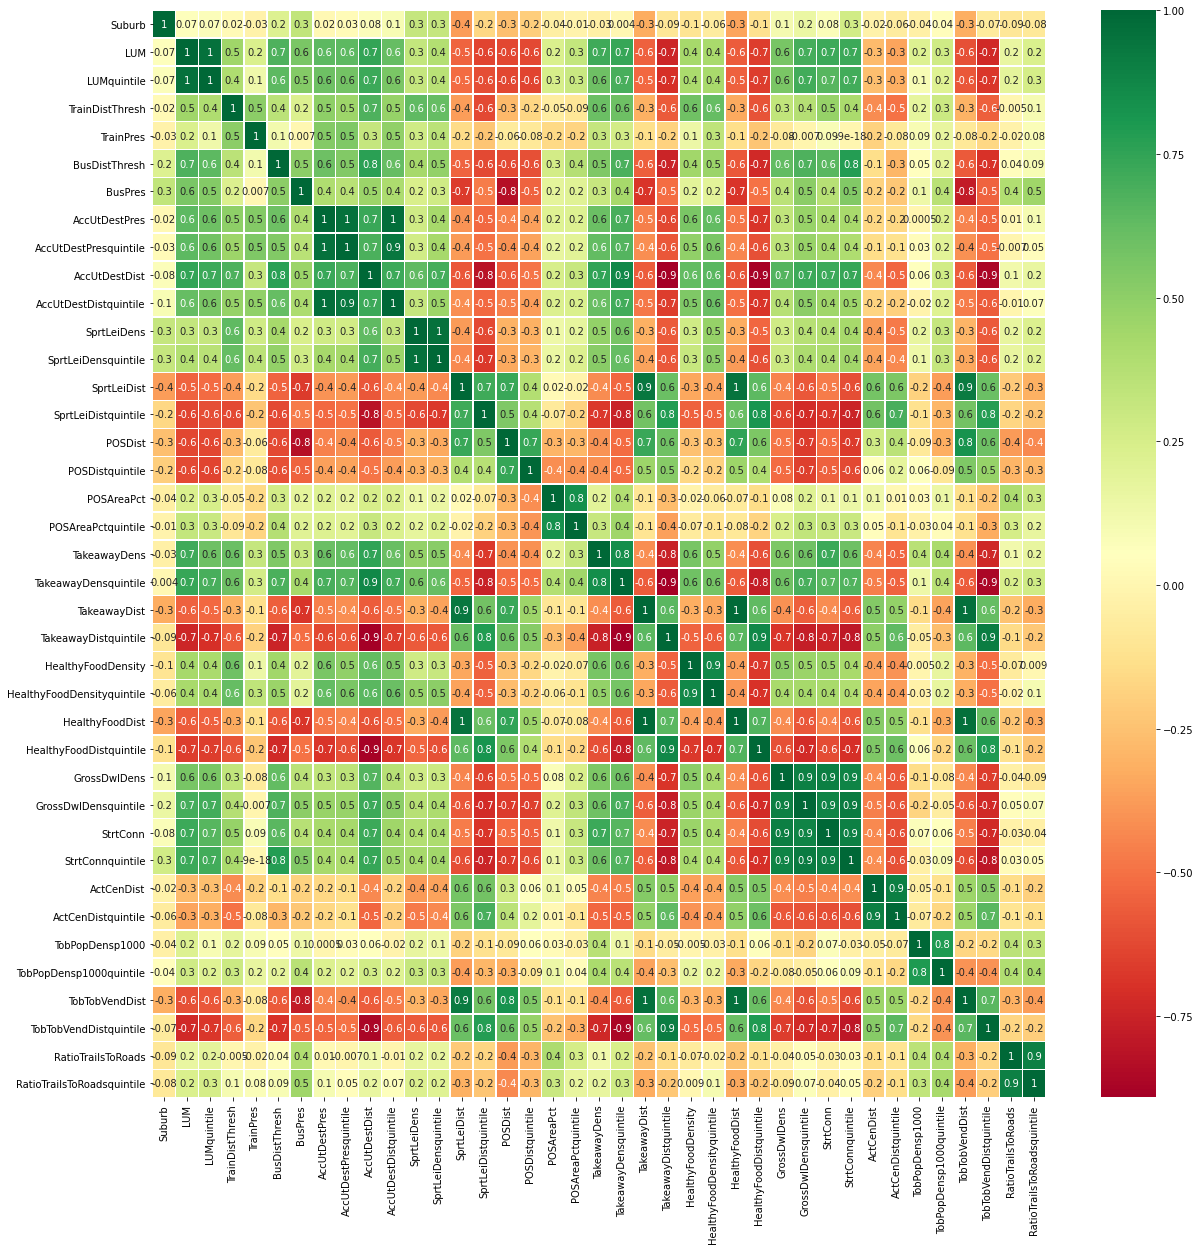

In [0]:
fig, ax = plt.subplots(figsize=(20,20))
labelEncoder.fit(dataset['Suburb'])
dataset['Suburb'] = labelEncoder.transform(dataset['Suburb'])
sb.heatmap(dataset.corr(),annot=True,fmt='.1g',cmap='RdYlGn',linewidths=.5,ax=ax)

In [0]:
y = dataset['TrainPres']
X = dataset.drop(columns="TrainPres",axis=1)

In [0]:
X.shape

(46, 27)

In [0]:
labelEncoder.fit(X['Suburb'])

LabelEncoder()

In [0]:
X['Suburb'] = labelEncoder.transform(X['Suburb'])

In [0]:
#X = X.drop(columns='Suburb',axis=1)

In [0]:
bestFeatures = SelectKBest(score_func=chi2,k=10)
fit = bestFeatures.fit(X,y)

In [0]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [0]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [0]:
featureScores

In [0]:
print(featureScores.nlargest(20,'Score'))

                         Specs         Score
23                  ActCenDist  10869.764756
11                 SprtLeiDist   6254.566423
17                TakeawayDist   5304.103717
21             HealthyFoodDist   4831.932423
5                AccUtDestPres     17.391467
6        AccUtDestPresquintile      9.184768
7                AccUtDestDist      9.118784
3              TrainDistThresh      8.881579
8        AccUtDestDistquintile      7.105361
10         SprtLeiDensquintile      5.830362
20  HealthyFoodDensityquintile      4.842105
16        TakeawayDensquintile      2.469675
14          POSAreaPctquintile      1.865132
22     HealthyFoodDistquintile      1.815789
12         SprtLeiDistquintile      1.724549
18        TakeawayDistquintile      1.107682
24     TobPopDensp1000quintile      0.885133
25      TobTobVendDistquintile      0.807018
15                TakeawayDens      0.753803
2                  LUMquintile      0.573626


In [0]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [0]:
print(model.feature_importances_)

[0.02789965 0.0297371  0.01459672 0.11935535 0.00732276 0.08170704
 0.08132381 0.03395529 0.08199838 0.04021608 0.03274524 0.02977177
 0.02454273 0.04309026 0.04118601 0.02852042 0.01635697 0.03119565
 0.01282997 0.02470773 0.01921087 0.02666871 0.01996528 0.04057345
 0.0268222  0.0200727  0.04362787]


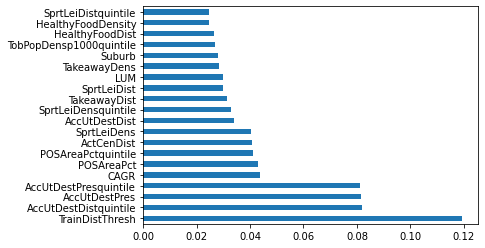

In [0]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [0]:
importantFeature = feat_importances.nlargest(20)

In [0]:
X_important = X[importantFeature.keys()]

In [0]:
from imblearn.combine import SMOTETomek

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
sml = SMOTETomek(random_state=42)

In [0]:
X_sampled,y_sampled = sml.fit_sample(X_important,y)
X_sampled.shape , y_sampled.shape

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


((68, 20), (68,))

In [0]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_sampled)))

Original dataset shape Counter({0: 38, 1: 8})
Resampled dataset shape Counter({0: 34, 1: 34})


In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

In [0]:
strSplit = StratifiedShuffleSplit(test_size=0.2)

In [0]:
# from sklearn.svm import SVC
# from sklearn import metrics
# clf = SVC(gamma='auto',kernel='linear')

In [0]:
for train,test in strSplit.split(X_sampled,y_sampled):
  train_x,train_y = X_sampled[train], y_sampled[train]
  test_x,test_y = X_sampled[test], y_sampled[test]
  #clf.fit(train_x, train_y)
  #predicted = clf.predict(test_x)
  #print(metrics.accuracy_score(test_y,predicted))

0.7857142857142857
0.9285714285714286
0.9285714285714286
0.7142857142857143
0.7142857142857143
0.7857142857142857
0.8571428571428571
1.0
0.9285714285714286
0.7142857142857143


In [0]:
#clf.fit(train_x, train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
#predicted = clf.predict(test_x)
#metrics.accuracy_score(test_y,predicted)

0.7142857142857143

In [0]:
testing = np.array(X_important.iloc[8])

In [0]:
testing = testing.reshape(1,20)

In [0]:
clf.predict(testing)

array([0])

In [0]:
from keras import regularizers
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.models import Sequential,Input,Model
from keras.layers import Conv2D, MaxPooling2D, Input, Lambda, Flatten, Dense

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [0]:
train_x.shape

(54, 20)

In [0]:
train_X_reshaped = np.reshape(train_x, (train_x.shape[0],train_x.shape[1],1))
test_X_reshaped = np.reshape(test_x, (test_x.shape[0],test_x.shape[1],1))

In [0]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (train_X_reshaped.shape[1], 1)))
#regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
#regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1,activation='sigmoid'))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])



In [0]:
# Fitting the RNN to the Training set
model_fit = regressor.fit(train_X_reshaped, train_y, epochs = 90, batch_size = 32)

Epoch 1/90
54/54 [==============================] - 0s 2ms/step - loss: 0.3889 - accuracy: 0.7778
Epoch 2/90
54/54 [==============================] - 0s 2ms/step - loss: 0.3715 - accuracy: 0.7963
Epoch 3/90
54/54 [==============================] - 0s 2ms/step - loss: 0.3618 - accuracy: 0.8333
Epoch 4/90
54/54 [==============================] - 0s 2ms/step - loss: 0.3594 - accuracy: 0.8148
Epoch 5/90
54/54 [==============================] - 0s 2ms/step - loss: 0.3461 - accuracy: 0.8148
Epoch 6/90
54/54 [==============================] - 0s 2ms/step - loss: 0.3341 - accuracy: 0.8333
Epoch 7/90
54/54 [==============================] - 0s 2ms/step - loss: 0.3298 - accuracy: 0.8519
Epoch 8/90
54/54 [==============================] - 0s 2ms/step - loss: 0.3160 - accuracy: 0.8333
Epoch 9/90
54/54 [==============================] - 0s 2ms/step - loss: 0.3499 - accuracy: 0.8333
Epoch 10/90
54/54 [==============================] - 0s 2ms/step - loss: 0.3304 - accuracy: 0.8148
Epoch 11/90
54/54 [

Average training accuracy across all epochs is 0.8782


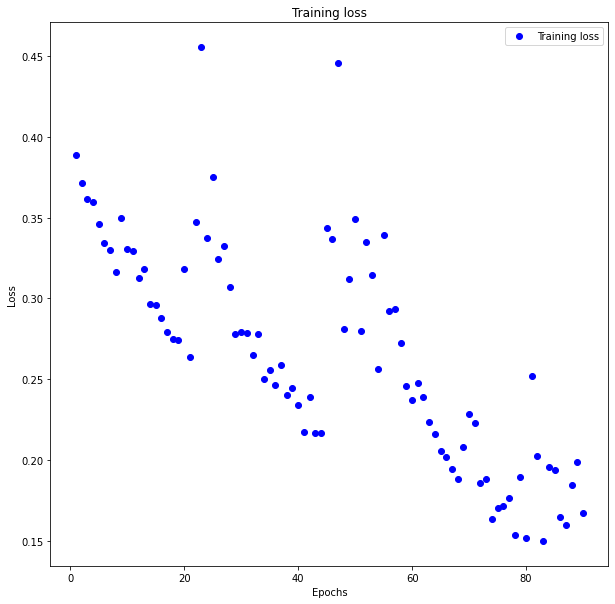

In [0]:
#Evaluating model over training and validation dataset
acc = model_fit.history['accuracy']
loss = model_fit.history['loss']

print("Average training accuracy across all epochs is",format(round(sum(acc)/len(acc),4)))


#Plotting training and validation loss with number of epochs
plt.figure(figsize=(10, 10))
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
#plt.plot(epochs, loss, 'b', label='Training loss', color = 'red')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
new_model_eval = regressor.evaluate(test_X_reshaped, test_y)
print(round(new_model_eval[0],4),round(new_model_eval[1],4))

14/14 [==============================] - 0s 11ms/step
0.2546 0.9286


In [0]:
test_neuralNet = testing.copy()
testing = testing.reshape(1,20)
train_X_reshaped = np.reshape(train_x, (train_x.shape[0],train_x.shape[1],1))

In [0]:
test_neuralNet = np.reshape(test_neuralNet, (test_neuralNet.shape[0],test_neuralNet.shape[1],1))

In [0]:
regressor.predict_classes(test_neuralNet)

array([[1]], dtype=int32)